In [2]:
using DataFrames, XLSX, CommonFeatures, Statistics, TensorToolbox, LinearAlgebra, Plots, Dates

datamatrix = XLSX.readdata("../data/reguib_northcentral.xlsx", "Sheet1!A2:S459");

nodates = Float64.(datamatrix[:, 2:end]);

unpermuted = reshape(nodates, (458, 2, 9));
tensordata = permutedims(unpermuted, (2, 3, 1));
matdata = tenmat(tensordata, col=3);

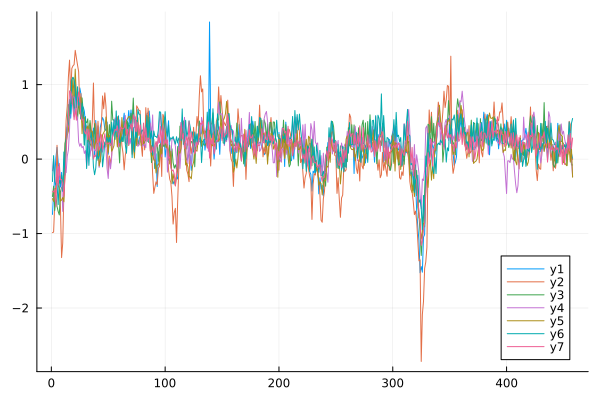

In [16]:
plot(tensordata[1,3:9, :]')

In [7]:
tucketa = 1e-02;
maxiter = 1000;
ϵ = 1e-03;
p = 1;
r = [2,9,2,9];
stdize = false;

In [8]:
tuckest = tuckerreg(tensordata, r, tucketa, maxiter, p, ϵ, stdize);

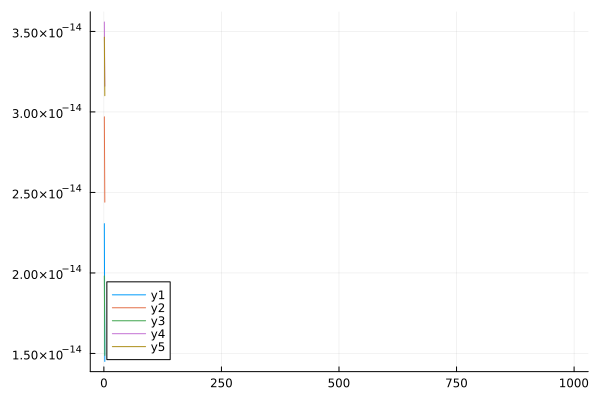

In [9]:
plot(tuckest.fullgrads)

# SCCF

- States go in the following order
- Iowa, Illinois, Indiana, Michigan, Minnesota, North Dakota, Ohio, South Dakota, Wisconsin
- Coincident, then Leading indicators

In [10]:
δ1 = nullspace(tuckest.U1')

2×0 Matrix{Float64}

In [11]:
round.(δ1 * inv(δ1[1]), digits=4)

LoadError: BoundsError: attempt to access 2×0 Matrix{Float64} at index [1]

Economic Indicators move together within a state.
Leading indicators seem to be 4 times the size of coincident indicators.

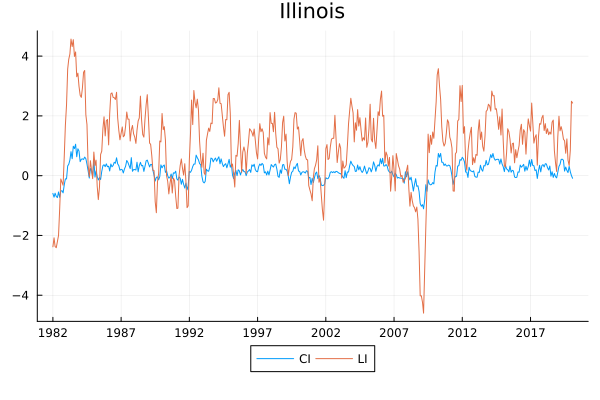

In [12]:
# Illinois
# Define date range
start_date = Date(1982, 1, 1)
end_date = Date(2020, 2, 1)
date_range = collect(start_date:Month(1):end_date)
ticks = Dates.format.(date_range,"yyyy")
drang = 1:60:length(date_range)

# Format ticks as dates
plot(date_range, tensordata[1, 2, :], label = "CI", title = "Illinois", xticks = (date_range[drang], ticks[drang]))
plot!(date_range, tensordata[2, 2, :], label = "LI")
plot!(legend=:outerbottom, legendcolumns=2)
# savefig("illinois.png")

In [ ]:
# Minnesota
# Define date range
start_date = Date(1982, 1, 1)
end_date = Date(2020, 2, 1)
date_range = collect(start_date:Month(1):end_date)
ticks = Dates.format.(date_range,"yyyy")
drang = 1:60:length(date_range)

# Format ticks as dates
plot(date_range, tensordata[1, 4, :], label = "CI", title = "Minnesota", xticks = (date_range[drang], ticks[drang]))
plot!(date_range, tensordata[2, 4, :], label = "LI")
plot!(legend=:outerbottom, legendcolumns=2)
# savefig("minnesota.png")

co-movements may be easier to view with the standardized data.

In [ ]:
stddata = tensordata ./ std(tensordata, dims = 3);
cendata = stddata .- mean(stddata, dims = 3);
plot(cendata[1:2, 9, :]')

In [ ]:
plot(cendata[1:2, 7, :]')

In [ ]:
plot(cendata[1, 1:3, :]')

# Factor Model

In [ ]:
marfacs = ttm(ttm(tensordata, tuckest.U3', 1), tuckest.U4', 2)  

We have a total of 9 factors, one for each country.

In [ ]:
plot(hcat(marfacs[1,1,:], tensordata[1:2,1,:]'))

In [ ]:
plot(hcat(-marfacs[1,2,:], tensordata[1:2,8,:]'))

In [ ]:
plot(hcat(marfacs[1,6,:], tensordata[1:2,8,:]'))

# Projection Matrices

In [ ]:
heatmap(["COI", "LEA"], ["COI", "LEA"], tuckest.U1 * tuckest.U1', c = :PuBu)
# savefig("respcoileaheatmap.png")

In [ ]:
heatmap(["COI", "LEA"], ["COI", "LEA"], tuckest.U3 * tuckest.U3', c = :PuBu)
# savefig("predcoileaheatmap.png")